# PCA geometry 

In this section, we analyze the behavior of Principal Component Analysis (PCA) from a geometric perspective. We focus on PCA as a linear transformation, interpreting the principal components as linear combinations of the original features and examining the contribution (weights) of each feature. Finally, we explore dimensionality reduction by projecting the dataset into 2- and 3-dimensional spaces.
As we've mentioned, robust scaler is the best tool to do the feature scaling but in this notebook we'll compare this scaler against the standard scaler

In [38]:
import pandas as pd
import numpy as np
import sys
import os
sys.path.append(os.path.join('..','src'))
from preprocesing import robust_scaling, standarization

In [39]:
df = pd.read_csv("../data/raw/wine.csv")

In [40]:
quality = df['quality']
df_robust_scaled = robust_scaling(df.drop(['quality', 'Id'], axis=1))
df_standard_scaled = standarization(df.drop(['quality','Id'], axis=1))

Before applying PCA, the target variable (quality) was separated from the dataset. Since PCA operates exclusively on the feature space and is an unsupervised linear transformation, only the scaled features were used for dimensionality reduction.

In [41]:
from sklearn.decomposition import PCA
pca_2d_rob= PCA(n_components=2)
pca_2d_std = PCA(n_components=2)

To analyze the geometric behavior or PCA, we define first a PCA transformation with two principal components. This allow us to study how the original feature space is projected onto a lower-dimensional orthogonal subespace.

In [42]:
pca_2d_rob.fit(df_robust_scaled)
pca_2d_std.fit(df_standard_scaled)

,"n_components n_components: int, float or 'mle', default=NoneNumber of components to keep.if n_components is not set all components are kept:: n_components == min(n_samples, n_features)If ``n_components == 'mle'`` and ``svd_solver == 'full'``, Minka'sMLE is used to guess the dimension. Use of ``n_components == 'mle'``will interpret ``svd_solver == 'auto'`` as ``svd_solver == 'full'``.If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select thenumber of components such that the amount of variance that needs to beexplained is greater than the percentage specified by n_components.If ``svd_solver == 'arpack'``, the number of components must bestrictly less than the minimum of n_features and n_samples.Hence, the None case results in:: n_components == min(n_samples, n_features) - 1",2
,"copy copy: bool, default=TrueIf False, data passed to fit are overwritten and runningfit(X).transform(X) will not yield the expected results,use fit_transform(X) instead.",True
,"whiten whiten: bool, default=FalseWhen True (False by default) the `components_` vectors are multipliedby the square root of n_samples and then divided by the singular valuesto ensure uncorrelated outputs with unit component-wise variances.Whitening will remove some information from the transformed signal(the relative variance scales of the components) but can sometimeimprove the predictive accuracy of the downstream estimators bymaking their data respect some hard-wired assumptions.",False
,"svd_solver svd_solver: {'auto', 'full', 'covariance_eigh', 'arpack', 'randomized'}, default='auto'""auto"" : The solver is selected by a default 'auto' policy is based on `X.shape` and `n_components`: if the input data has fewer than 1000 features and more than 10 times as many samples, then the ""covariance_eigh"" solver is used. Otherwise, if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ""randomized"" method is selected. Otherwise the exact ""full"" SVD is computed and optionally truncated afterwards.""full"" : Run exact full SVD calling the standard LAPACK solver via `scipy.linalg.svd` and select the components by postprocessing""covariance_eigh"" : Precompute the covariance matrix (on centered data), run a classical eigenvalue decomposition on the covariance matrix typically using LAPACK and select the components by postprocessing. This solver is very efficient for n_samples >> n_features and small n_features. It is, however, not tractable otherwise for large n_features (large memory footprint required to materialize the covariance matrix). Also note that compared to the ""full"" solver, this solver effectively doubles the condition number and is therefore less numerical stable (e.g. on input data with a large range of singular values).""arpack"" : Run SVD truncated to `n_components` calling ARPACK solver via `scipy.sparse.linalg.svds`. It requires strictly `0 < n_components < min(X.shape)`""randomized"" : Run randomized SVD by the method of Halko et al... versionadded:: 0.18.0.. versionchanged:: 1.5 Added the 'covariance_eigh' solver.",'auto'
,"tol tol: float, default=0.0Tolerance for singular values computed by svd_solver == 'arpack'.Must be of range [0.0, infinity)... versionadded:: 0.18.0",0.0
,"iterated_power iterated_power: int or 'auto', default='auto'Number of iterations for the power method computed bysvd_solver == 'randomized'.Must be of range [0, infinity)... versionadded:: 0.18.0",'auto'
,"n_oversamples n_oversamples: int, default=10This parameter is only relevant when `svd_solver=""randomized""`.It corresponds to the additional number of random vectors to sample therange of `X` so as to ensure proper conditioning. See:func:`~sklearn.utils.extmath.randomized_svd` for more details... versionadded:: 1.1",10
,"power_iteration_normalizer power_iteration_normalizer: {'auto', 'QR', 'LU', 'none'}, default='auto'Power iteration normalizer for randomized SVD 

The PCA model is fitted using the scaled feature matrix. During this step, PCA identifies the orthogonal directions in the feature space that maximize the variance, defining a new ortonormal basis onto which the data will later be projected

In [43]:
df_rob_pca_2d = pca_2d_rob.transform(df_robust_scaled)
df_std_pca_2d = pca_2d_std.transform(df_standard_scaled)
df_rob_pca_2d = pd.DataFrame(df_rob_pca_2d, columns=['R PC1', 'R PC2'])
df_std_pca_2d = pd.DataFrame(df_std_pca_2d, columns=['Z PC1', 'Z PC2'])
df_std_pca_2d

,Z PC1,Z PC2
0,-1.560862,0.444697
1,-0.760559,1.914220
2,-0.707776,0.914023
3,2.307156,-0.224350
4,-1.560862,0.444697
...,...,...
1138,-1.441602,0.332007
1139,-1.222463,0.921215
1140,-2.123706,0.873422
1141,-2.207569,0.927936


In [44]:
df_rob_pca_2d

,R PC1,R PC2
0,-0.928546,-0.829030
1,0.599772,-0.027722
2,0.165885,-0.413217
3,-0.420131,-0.314635
4,-0.928546,-0.829030
...,...,...
1138,-0.752741,-0.364786
1139,-1.068086,-0.784828
1140,-0.391939,-0.974913
1141,-1.540176,-0.354951


After fitting PCA, the scaled data is projected onto the principal component basis. This transformation maps each observation from the original feature space to coordinates defined by the principal components, resulting in a lower-dimensional representation that preserves the dominant variance structure

In [45]:
loadings_std_2d = pd.DataFrame(pca_2d_std.components_.T, index=df_standard_scaled.columns, columns=['Z PC1', 'Z PC2'])
loadings_rob_2d = pd.DataFrame(pca_2d_rob.components_.T, index=df_robust_scaled.columns, columns=['R PC1', 'R PC2'])
loadings_rob_2d

,R PC1,R PC2
fixed acidity,0.084012,0.105273
volatile acidity,0.003274,-0.016553
citric acid,0.084515,0.052929
residual sugar,0.202629,0.938956
chlorides,0.938958,-0.240332
free sulfur dioxide,0.012810,0.067937
total sulfur dioxide,0.031584,0.088726
density,0.121876,0.172762
pH,-0.122285,-0.044532
sulphates,0.166135,-0.037501


In [46]:
loadings_std_2d

,Z PC1,Z PC2
fixed acidity,0.485339,-0.102328
volatile acidity,-0.227143,0.288786
citric acid,0.460075,-0.146508
residual sugar,0.174506,0.252262
chlorides,0.224870,0.153133
free sulfur dioxide,-0.047852,0.517022
total sulfur dioxide,0.015069,0.577393
density,0.399684,0.217537
pH,-0.432844,-0.006374
sulphates,0.237555,-0.062280


These tables reveal the internal structure of the principal components; in other words, they display the weights of the linear combinations of features that define PC1 and PC2. We observe that the loadings differ substantially between the StandardScaler and RobustScaler preprocessing pipelines. This occurs because PCA is applied to the covariance structure of the scaled data, which is altered differently depending on the chosen scaling method.

For instance, under StandardScaler, chlorides exhibit the largest weight in the first principal component, whereas under RobustScaler, fixed acidity dominates PC1. This demonstrates that the geometric representation learned by PCA is not intrinsic to the raw dataset but is instead strongly dependent on the feature scaling process.


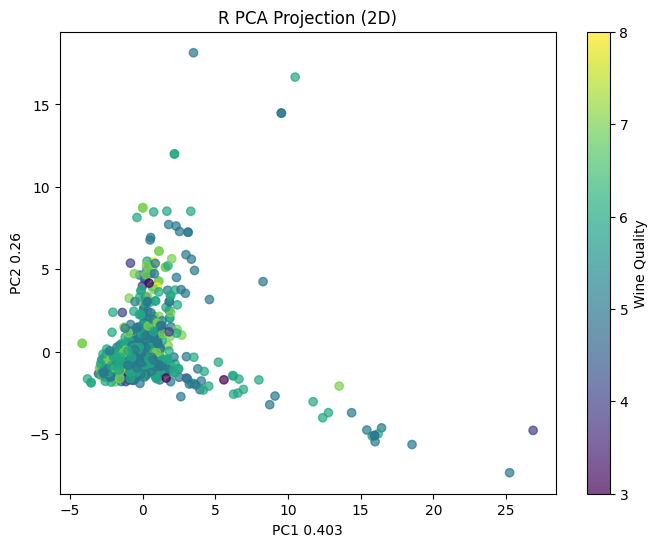

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
scatter = plt.scatter(df_rob_pca_2d['R PC1'], df_rob_pca_2d['R PC2'], c=quality, alpha=0.7)
plt.xlabel(f"PC1 {pca_2d_rob.explained_variance_ratio_[0].round(3)}")
plt.ylabel(f"PC2 {pca_2d_rob.explained_variance_ratio_[1].round(3)}")
plt.title("R PCA Projection (2D)")
plt.colorbar(scatter, label="Wine Quality")
plt.show()

After plotting the data in two dimensions, the first noticeable aspect is the absence of clearly defined clusters. This lack of class separation suggests that the target variable is not aligned with the directions of maximum variance identified by PCA. Although most observations are concentrated, a few outliers are clearly visible.

Since the first principal component captures the largest proportion of the total variance, distances between points are more pronounced along the PC1 axis than along PC2. This is reflected in the explained variance ratios: PC1 accounts for approximately 40% of the total variance, while PC2 explains about 26%. Consequently, the two-dimensional PCA representation preserves around 66% of the dataset’s variability. Adding a third principal component could increase the retained variance and potentially reveal additional geometric structure in a three-dimensional projection.

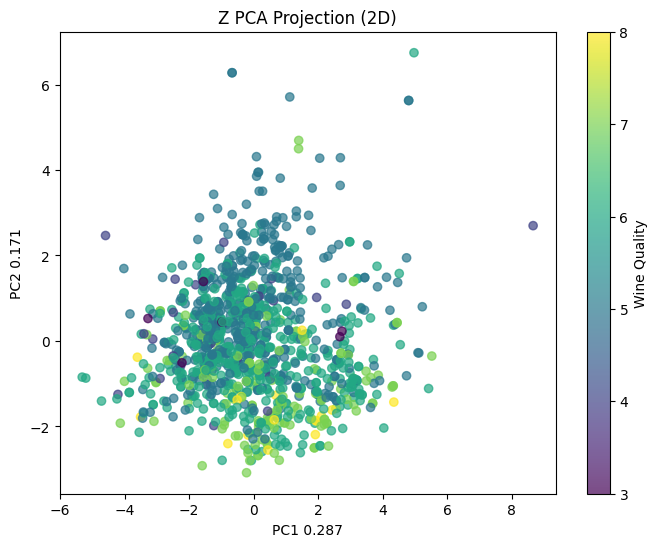

In [50]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(df_std_pca_2d['Z PC1'], df_std_pca_2d['Z PC2'], c=quality, alpha=0.7)
plt.xlabel(f"PC1 {pca_2d_std.explained_variance_ratio_[0].round(3)}")
plt.ylabel(f"PC2 {pca_2d_std.explained_variance_ratio_[1].round(3)}")
plt.title("Z PCA Projection (2D)")
plt.colorbar(scatter, label="Wine Quality")
plt.show()

In this case, we observe that the explained variance ratios of the first two principal components are lower than those obtained using RobustScaler. This indicates that the first principal component captures a smaller fraction of the total dataset variance, suggesting that more components would be required to achieve a comparable level of variance preservation.

Despite this reduction in explained variance, the projection appears more spatially spread, as the data are not as tightly concentrated along a single direction. However, similar to the RobustScaler case, no clearly defined clusters emerge. This confirms that although PCA is a useful technique for dimensionality reduction and geometric analysis, it does not guarantee the emergence of cluster structures, as it does not optimize for class separation.

In [54]:
pca_3d_rob = PCA(n_components=3)
pca_3d_std = PCA(n_components=3)
df_rob_pca_3d = pca_3d_rob.fit_transform(df_robust_scaled)
df_std_pca_3d = pca_3d_std.fit_transform(df_standard_scaled)
rob_data_3d = pd.DataFrame(df_rob_pca_3d, columns=['R PC1','R PC2','R PC3'])
std_data_3d = pd.DataFrame(df_std_pca_3d, columns=['Z PC1', 'Z PC2', 'Z PC3'])
std_data_3d

,Z PC1,Z PC2,Z PC3
0,-1.560862,0.444697,-1.766436
1,-0.760559,1.914220,-0.863780
2,-0.707776,0.914023,-1.141863
3,2.307156,-0.224350,0.256783
4,-1.560862,0.444697,-1.766436
...,...,...,...
1138,-1.441602,0.332007,1.137315
1139,-1.222463,0.921215,0.027222
1140,-2.123706,0.873422,0.626298
1141,-2.207569,0.927936,1.814609


In [58]:
loadings_rob_3d = pd.DataFrame(pca_3d_rob.components_.T, index=df_robust_scaled.columns, columns=['R PC1','R PC2','R PC3'])
loadings_std_3d = pd.DataFrame(pca_3d_std.components_.T, index=df_standard_scaled.columns, columns=['Z PC1','Z PC2','Z PC3'])
loadings_rob_3d

,R PC1,R PC2,R PC3
fixed acidity,0.084012,0.105273,0.603532
volatile acidity,0.003274,-0.016553,-0.255166
citric acid,0.084515,0.052929,0.311669
residual sugar,0.202629,0.938956,-0.178683
chlorides,0.938958,-0.240332,-0.171531
free sulfur dioxide,0.012810,0.067937,-0.199741
total sulfur dioxide,0.031584,0.088726,-0.178284
density,0.121876,0.172762,0.355177
pH,-0.122285,-0.044532,-0.419998
sulphates,0.166135,-0.037501,0.188501


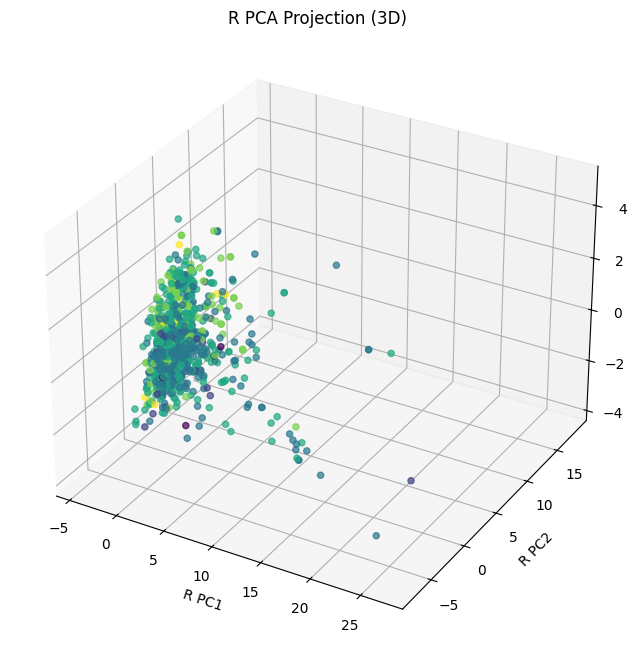

In [59]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(rob_data_3d['R PC1'], rob_data_3d['R PC2'], rob_data_3d['R PC3'], c=quality, alpha=0.7)
ax.set_xlabel('R PC1')
ax.set_ylabel('R PC2')
ax.set_zlabel('R PC3')
plt.title('R PCA Projection (3D)')
plt.show()

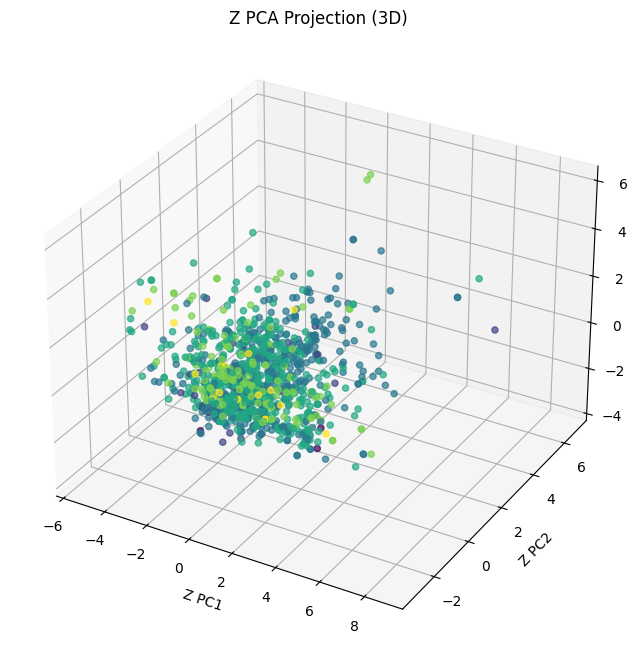

In [61]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(std_data_3d['Z PC1'], std_data_3d['Z PC2'], std_data_3d['Z PC3'], c=quality, alpha=0.7)
ax.set_xlabel('Z PC1')
ax.set_ylabel('Z PC2')
ax.set_zlabel('Z PC3')
plt.title('Z PCA Projection (3D)')
plt.show()